<a href="https://colab.research.google.com/github/SUDAR2005/NLP-Task/blob/main/NLP_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a recommendation engine using Content based method for a e-commerce website

In [ ]:
#importing necesaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#loading dataset
data = pd.read_csv('/content/drive/MyDrive/NLP-Internship/Dataset/flipkart_com-ecommerce_sample.csv')
data.columns = data.columns.str.lower()
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_fk_advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
#adding some necessary columns for analysis
data['length'] = data['description'].str.len()
data['word_count'] = data['description'].apply(lambda x: len(str(x).split()))
data['bins'] = pd.cut(data.word_count,[0,30,50,80,100,300,600,np.inf])
# without size unnordered
print(data.bins.value_counts().reset_index())

             bins  count
0    (30.0, 50.0]   7984
1     (0.0, 30.0]   4934
2  (100.0, 300.0]   3497
3    (50.0, 80.0]   1958
4   (80.0, 100.0]   1265
5  (300.0, 600.0]    341
6    (600.0, inf]     21


In [ ]:
#Calculating distribution of words
word_count = data.groupby('bins').size().reset_index(name='count') #with size ordered
print(type(word_count))
print(word_count)
data.head()

<class 'pandas.core.frame.DataFrame'>
             bins  count
0     (0.0, 30.0]   4934
1    (30.0, 50.0]   7984
2    (50.0, 80.0]   1958
3   (80.0, 100.0]   1265
4  (100.0, 300.0]   3497
5  (300.0, 600.0]    341
6    (600.0, inf]     21


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_fk_advantage_product,description,product_rating,overall_rating,brand,product_specifications,length,word_count,bins
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",410.0,64,"(50.0, 80.0]"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",4433.0,752,"(600.0, inf]"
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",650.0,107,"(100.0, 300.0]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",403.0,63,"(50.0, 80.0]"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",248.0,40,"(30.0, 50.0]"


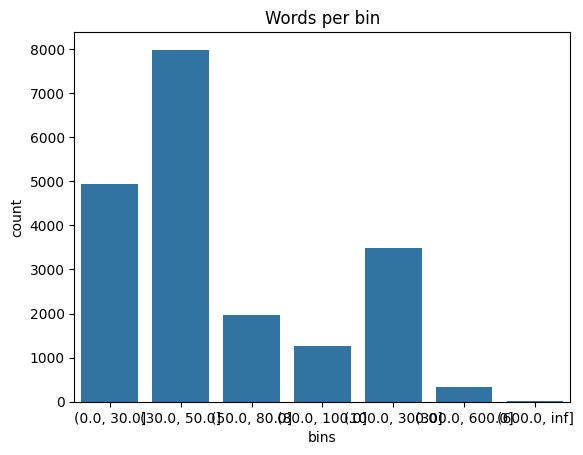

In [ ]:
sns.barplot(x='bins',y='count',data=word_count).set_title('Words per bin')
sns.set(rc={'figure.figsize':(15,15)})

In [ ]:
#Calculating the missing data count in each field
missing_data = pd.DataFrame(data.isnull().sum()).reset_index().rename(columns={0:'missing_count'})
#print(missing_data)
#Calculate the percentage of missing data
missing_data['percentage'] = (missing_data['missing_count']/len(data))*100
print(missing_data)

                      index  missing_count  percentage
0                   uniq_id              0       0.000
1           crawl_timestamp              0       0.000
2               product_url              0       0.000
3              product_name              0       0.000
4     product_category_tree              0       0.000
5                       pid              0       0.000
6              retail_price             78       0.390
7          discounted_price             78       0.390
8                     image              3       0.015
9   is_fk_advantage_product              0       0.000
10              description              2       0.010
11           product_rating              0       0.000
12           overall_rating              0       0.000
13                    brand           5864      29.320
14   product_specifications             14       0.070
15                   length              2       0.010
16               word_count              0       0.000
17        

Preprocessing

In [ ]:
#removing punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')
# Create a translation table.
translator = str.maketrans('', '', string.punctuation)
# Remove punctuation from the string.
data['description'] = data['description'].str.translate(translator)

#converting into single space
data['description'] = data['description'].str.replace(r'\s+',' ')
#converting to lower case
data['description'] = data['description'].str.lower()
#replacing number
data['description'] = data['description'].str.replace(r'\d+','numbr')
data.head()

In [ ]:
from nltk.corpus import stopwords
'''import nltk
nltk.download('stopwords')'''
#incase corpus not foun use the above lines
stopwords = stopwords.words('english')
print(stopwords)
def handleStopword(word):
  data['description'] = data['description'].astype(str)
  data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in word ))
  return data


#calling function
data = handleStopword(stopwords)
#data.head()

#removing domain specific stopwords
specific_stop_words = [ "rs", "flipkart.com", "buy", "com", "free", "day",
                       "cash", "re placement", "guarantee", "genuine",
                        "key","feature", "delivery", "products", "product",
                        "shipping", "online", "india", "shop"]
data = handleStopword(specific_stop_words)
#if any single character present after this process remove that
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1 ))
data.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_fk_advantage_product,description,product_rating,overall_rating,brand,product_specifications,length,word_count,bins
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,features alisha solid womens cycling shorts co...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",410.0,64,"(50.0, 80.0]"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed finish col...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",4433.0,752,"(600.0, inf]"
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,features aw bellies sandals wedges heel casual...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",650.0,107,"(100.0, 300.0]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,features alisha solid womens cycling shorts co...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",403.0,63,"(50.0, 80.0]"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications sicons purpose arnica dog shamp...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",248.0,40,"(30.0, 50.0]"


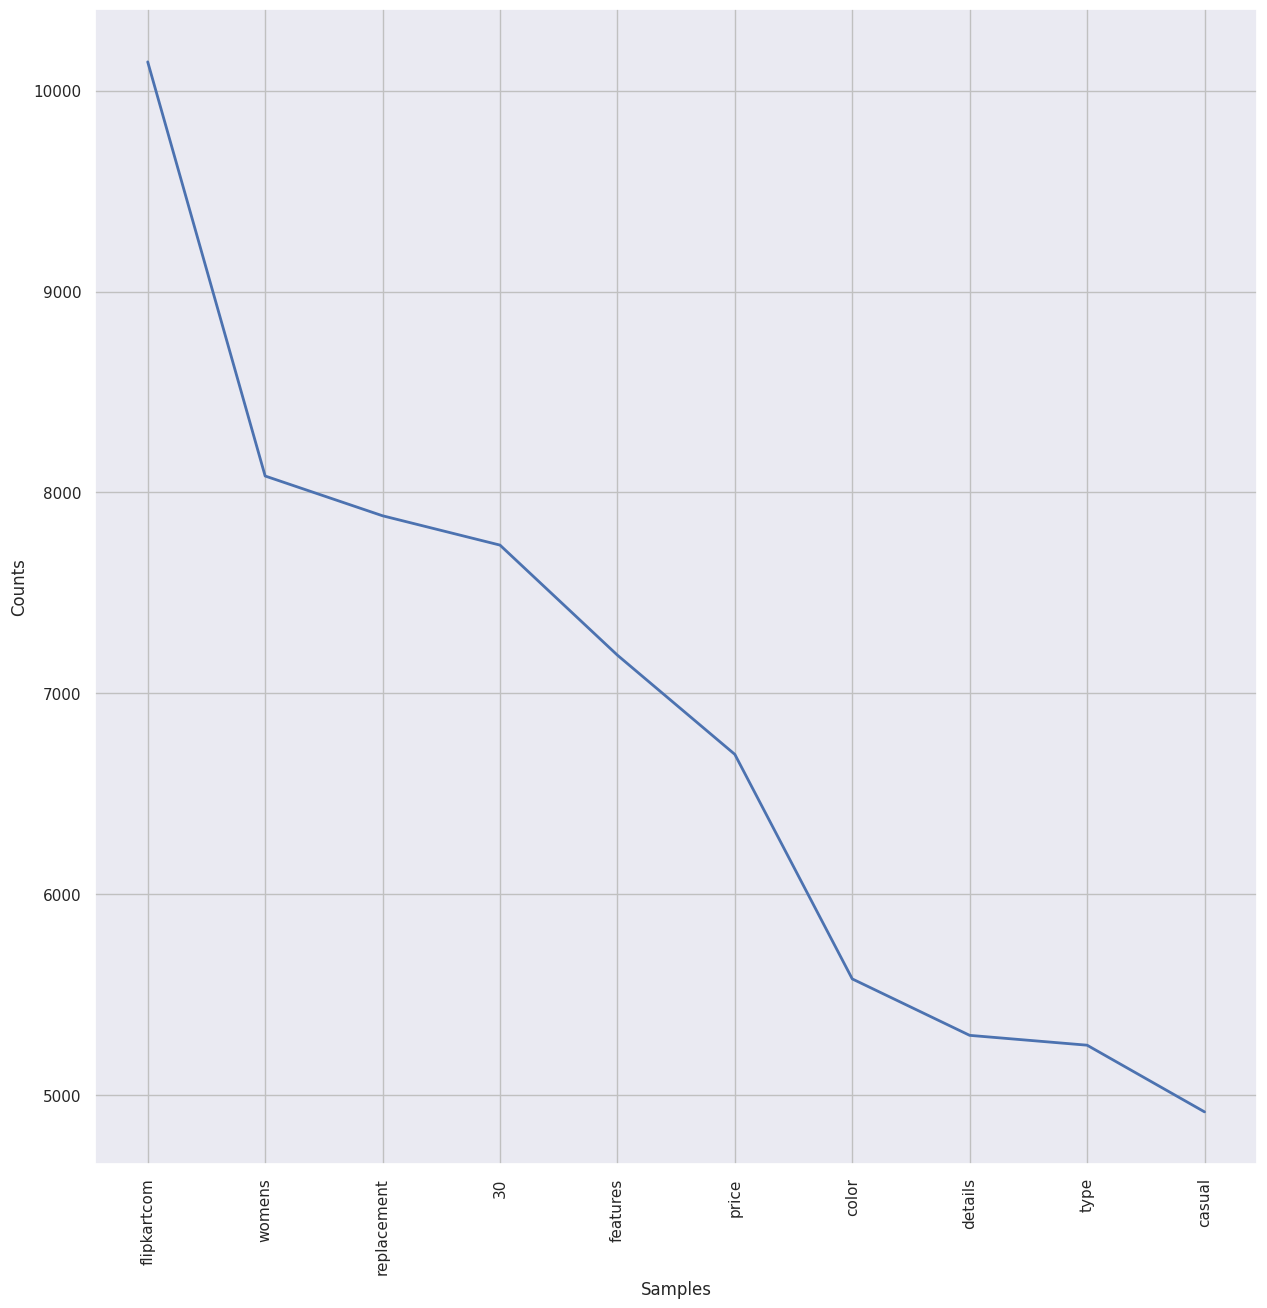

[('flipkartcom', 10144), ('womens', 8082), ('replacement', 7884), ('30', 7738), ('features', 7190), ('price', 6696), ('color', 5578), ('details', 5297), ('type', 5248), ('casual', 4916)]


In [ ]:
#Check the frequency of each word
'''nltk.download('punkt')'''
seperated_word = data['description'].str.cat(sep=" ")

from nltk.tokenize import word_tokenize
words = word_tokenize(seperated_word)
#print(type(words))

word_freq = nltk.FreqDist(words)
#print(type(word_freq))
word_freq.plot(10,cumulative=False)
print(word_freq.most_common(10))

In [ ]:
#now handling empty field
from sklearn.feature_extraction.text import TfidfVectorizer
data['description'] = data['description'].fillna('')
tfid = TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix = tfid.fit_transform(data['description'])
print(tfidf_matrix.shape)
#print(type(tfidf_matrix))

(20000, 32511)


In [ ]:
#reversing the map of index and product
prdt_indx = pd.Series(data.index, index=data['product_name']).drop_duplicates()
print(prdt_indx)

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
WallDesign Small Vinyl Sticker             19995
Wallmantra Large Vinyl Stickers Sticker    19996
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
Length: 20000, dtype: int64


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def predict(product_name):
    # Get the index of the product from the mapping
    idx = prdt_indx[product_name]
    #precheck for instance matching
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]
    #cosine similarity table
    scorematrix = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)
    #enumerating list
    matching_score = list(enumerate(scorematrix[0]))
    #sort as required
    matching_score = sorted(matching_score, key=lambda x: x[1], reverse=True)
    #get top 10 products
    matching_score = matching_score[1:11] if matching_score[0][0] == idx else matching_score[:10]
    product_indices = [i[0] for i in matching_score]
    return data['product_name'].iloc[product_indices]

In [ ]:
try:
  recommended_product = predict(input("Enter the product name: "))
  print("The Recommendation Products are: ")
  for product in recommended_product:
    print(product)
except:
  print("The product is not foung in the list")

Enter the product name: AW Bellies
The Recommendation Products are: 
Shopnetix Stylish & Comfort Men's Lace up Mocassins (SNX-4449) Casuals
Bootwale Bellies
Bootwale Bellies
Bootwale Bellies
Bootwale Bellies
Lee Parke Running Shoes
Bootwale Bellies
Bootwale Bellies
BrandTrendz Bellies
femitaly Women Bellies
